```sql
SELECT s.specObjId, s.bestObjId, s.z, s.zErr, s.ra, s.dec,
    h_alpha_flux,
    h_beta_flux,
    h_gamma_flux,
    h_delta_flux,
    oii_3726_flux,
    oii_3729_flux,
    neiii_3869_flux,
    oiii_4363_flux,
    oiii_4959_flux,
    oiii_5007_flux,
    hei_5876_flux,
    oi_6300_flux,
    nii_6548_flux,
    nii_6584_flux,
    sii_6717_flux,
    sii_6731_flux,
    ariii7135_flux,
    oii_flux,
    oiii_flux,
    h_alpha_eqw,
    h_beta_eqw,
    h_gamma_eqw,
    h_delta_eqw,
    oii_3726_eqw,
    oii_3729_eqw,
    neiii_3869_eqw,
    oiii_4363_eqw,
    oiii_4959_eqw,
    oiii_5007_eqw,
    hei_5876_eqw,
    oi_6300_eqw,
    nii_6548_eqw,
    nii_6584_eqw,
    sii_6717_eqw,
    sii_6731_eqw,
    ariii7135_eqw,
    oii_sigma,
    oiii_sigma,
    v_off_balmer,
    v_off_forbidden,
    oii_voff,
    oiii_voff
FROM SpecObj s
JOIN GalSpecLine AS g ON s.specobjid = g.specobjid
--JOIN dbo.fGetObjFromRectEq(169.5, -5.0, 188.3, 5.8) r ON s.bestObjId = r.objID
WHERE s.class = 'STAR' AND zWarning = 0 AND
    h_alpha_flux > h_alpha_flux_err * 5 AND
    h_beta_flux > h_beta_flux_err * 5
```


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Reload the dataset
file_path = "../Skyserver_SQL12_11_2023 8_00_43 AM.csv"
dataset = pd.read_csv(file_path, skiprows=1)

/Users/i/Library/Caches/pypoetry/virtualenvs/starclass-uQVTgZe_-py3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/i/Library/Caches/pypoetry/virtualenvs/starclass-uQVTgZe_-py3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/i/Library/Caches/pypoetry/virtualenvs/starclass-uQVTgZe_-py3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Use

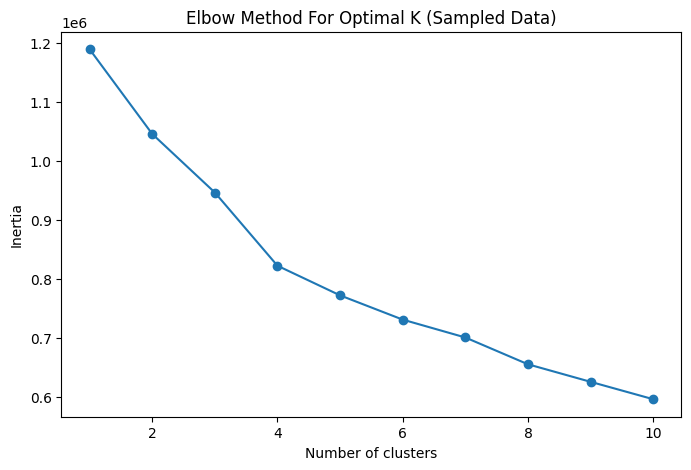

In [2]:
non_spectral_columns = ["specObjId", "bestObjId", "ra", "dec", "z", "zErr"]

# Remove columns with all zero values
columns_to_remove = [
    col
    for col in dataset.columns
    if dataset[col].nunique() == 1 and dataset[col].iloc[0] == 0
]
cleaned_dataset = dataset.drop(columns=columns_to_remove)

# Remove non-spectral columns
cleaned_dataset = cleaned_dataset.drop(columns=non_spectral_columns)

# Normalizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_dataset)

# Re-running the Elbow Method with the sampled data
inertia_sampled = []
k_values = range(1, 11)  # Trying different numbers of clusters from 1 to 10
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    inertia_sampled.append(kmeans.inertia_)

# Plotting the Elbow Curve for the sampled data
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_sampled, marker="o")
plt.title("Elbow Method For Optimal K (Sampled Data)")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [3]:
# K=4 seems to be the optimal number of clusters for the sampled data
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(scaled_data)

dataset["cluster"] = kmeans.labels_
print(dataset["cluster"].value_counts())

/Users/i/Library/Caches/pypoetry/virtualenvs/starclass-uQVTgZe_-py3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster
1    15767
0    13871
3       80
2        1
Name: count, dtype: int64


In [4]:
# Sample first 100 rows for each cluster
sampled_dataset = dataset.groupby("cluster").head(10)
sampled_dataset.sort_values(by="cluster")

,specObjId,bestObjId,z,zErr,ra,dec,h_alpha_flux,h_beta_flux,h_gamma_flux,h_delta_flux,...,sii_6717_eqw,sii_6731_eqw,ariii7135_eqw,oii_sigma,oiii_sigma,v_off_balmer,v_off_forbidden,oii_voff,oiii_voff,cluster
0,3090699219116255232,1237668296604909665,-0.000041,0.000020,212.335380,16.723846,4.031999e+02,1.056489e+02,6.734271e+01,3.315700e+01,...,0.756862,1.086001,3.450623,110.33240,260.645800,11.846150,247.69790,11.870280,129.54640,0
25,1270115744473966592,1237663716556538085,-0.000188,0.000008,12.144571,0.999167,1.684678e+02,1.194990e+02,6.926186e+01,2.999482e+01,...,0.086009,0.019849,1.105403,500.00000,500.000000,300.000000,300.00000,300.000000,300.00000,0
2,2550225473045030912,1237667210501947917,0.000187,0.000015,119.329480,12.494872,4.710172e+01,2.232437e+01,1.332963e+01,1.103795e+01,...,0.267885,0.307651,2.041493,227.58060,250.606500,6.352276,271.49140,6.342222,144.69370,0
23,1273447818907904000,1237663784202731543,0.000025,0.000016,12.143902,0.000850,7.375548e+01,1.846745e+01,3.389411e+01,9.632298e+00,...,0.181058,0.336872,2.255691,500.00000,248.949400,-164.010900,256.81110,-170.973500,154.24340,0
4,3072748320557393920,1237664093430874779,0.000275,0.000011,119.333050,19.071964,3.745422e+01,2.038049e+01,1.533600e+01,9.424574e+00,...,0.187401,-0.014068,1.078308,500.00000,500.000000,-91.385160,300.00000,-91.385160,300.00000,0
21,3228014481690880000,1237648720143712574,0.000745,0.000013,149.671750,-0.974136,1.214307e+01,5.744967e+00,2.339399e+00,9.969195e-01,...,0.213204,-0.086022,0.453775,126.63750,500.000000,9.257275,300.00000,9.257275,300.00000,0
16,2039037501036849152,0,0.000027,0.000017,215.880900,8.509531,6.392630e+01,2.349472e+01,2.637773e+01,1.203339e+01,...,0.741601,0.220735,2.138679,207.40840,500.000000,-31.728010,199.71210,-31.728010,199.71210,0
7,1210481537284335616,1237657071697133758,0.000038,0.000012,30.009579,0.663710,1.337641e+02,6.008218e+01,5.690913e+01,3.666149e+01,...,0.231707,0.194532,1.647679,311.37180,232.501600,20.170650,259.58070,19.312650,129.01780,0
14,2325006459080828928,1237663782599983340,0.000027,0.000013,30.099830,-1.133365,3.320935e+01,1.059872e+01,1.373332e+01,2.102490e+00,...,0.238780,0.126813,3.332337,138.35350,251.393700,-23.045730,205.29410,-25.734420,229.56350,0
13,2155089307369498624,1237652900758421555,0.000045,0.000008,23.821375,-9.383931,1.004267e+02,8.715563e+01,7.304524e+00,-2.229826e+01,...,0.033815,-0.026627,0.904993,500.00000,500.000000,300.000000,300.00000,300.000000,300.00000,0


In [5]:
import os


# Function to generate URLs and filenames
def generate_urls(ra_list, dec_list, scale, width, height):
    base_url = "https://skyserver.sdss.org/dr18/SkyServerWS/ImgCutout/getjpeg"
    params = {
        "TaskName": "SkyServer.Chart.List",
        "scale": scale,
        "width": width,
        "height": height,
        "opt": "",
    }
    for ra, dec in zip(ra_list, dec_list):
        params["ra"] = ra
        params["dec"] = dec
        yield f"{base_url}?{'&'.join([f'{k}={v}' for k, v in params.items()])}", f"image_{ra}_{dec}.jpg"


ra_list = dataset["ra"].tolist()
dec_list = dataset["dec"].tolist()

# Define other parameters
scale = 0.4
width = 120
height = 120

# Create a directory for images
os.makedirs("../images", exist_ok=True)

# Write to aria2 input file
with open("../aria2_input.txt", "w") as f:
    for url, filename in generate_urls(ra_list, dec_list, scale, width, height):
        if not os.path.exists(f"../images/{filename}"):
            f.write(f"{url}\n  out={filename}\n\n")

In [6]:
import shutil

# Grouping images by cluster
for cluster in range(4):
    cluster_df = dataset[dataset["cluster"] == cluster]
    ra_list = cluster_df["ra"].tolist()
    dec_list = cluster_df["dec"].tolist()

    # Create a directory for images
    os.makedirs(f"../images_clustered/cluster_{cluster}", exist_ok=True)

    # Copy images to the directory
    for url, filename in generate_urls(ra_list, dec_list, scale, width, height):
        try:
            shutil.copy(
                f"../images/{filename}", f"../images_clustered/cluster_{cluster}"
            )
        except FileNotFoundError:
            pass

In [7]:
from astropy.io import fits

# http://dr18.sdss.org/sas/dr18/spectro/sdss/redux/26/spectra/lite/2906/spec-2906-54577-0461.fits
with fits.open("../spec-2906-54577-0461.fits") as hdul:
    (hdul.info())
    coadd_data = pd.DataFrame(hdul[1].data)  # type: ignore

Filename: ../spec-2906-54577-0461.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     154   ()      
  1  COADD         1 BinTableHDU     26   3844R x 8C   [E, E, E, J, J, E, E, E]   
  2  SPECOBJ       1 BinTableHDU    262   1R x 126C   [6A, 4A, 16A, 23A, 16A, 8A, E, E, E, J, E, E, J, B, B, B, B, B, B, J, 22A, 19A, 19A, 22A, 19A, I, 3A, 3A, 1A, J, D, D, D, E, E, 19A, 8A, J, J, J, J, K, K, J, J, J, J, J, J, K, K, K, K, I, J, J, J, J, 5J, D, D, 6A, 21A, E, E, E, J, E, 24A, 10J, J, 10E, E, E, E, E, E, E, J, E, E, E, J, E, 5E, E, 10E, 10E, 10E, 5E, 5E, 5E, 5E, 5E, J, J, E, E, E, E, E, E, 25A, 21A, 10A, E, E, E, E, E, E, E, E, J, E, E, J, 1A, 1A, E, E, J, J, 1A, 5E, 5E]   
  3  SPZLINE       1 BinTableHDU     48   29R x 19C   [J, J, J, 13A, D, E, E, E, E, E, E, E, E, E, E, J, J, E, E]   


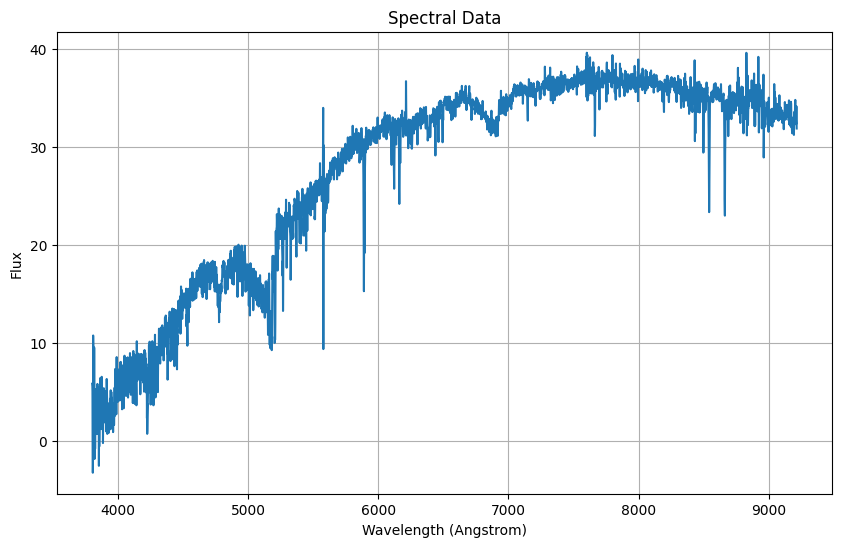

In [8]:
coadd_data.to_csv("../spec-2906-54577-0461.csv")

import matplotlib.pyplot as plt

# Extract wavelength (converting from loglam) and flux
wavelength = 10 ** coadd_data["loglam"]  # Assuming loglam is log10 of wavelength
flux = coadd_data["flux"]


# Plotting
def plot_spectrum(wavelength, flux):
    plt.plot(wavelength, flux)
    plt.xlabel("Wavelength (Angstrom)")
    plt.ylabel("Flux")
    plt.title("Spectral Data")
    plt.grid(True)


plt.figure(figsize=(10, 6))
plot_spectrum(wavelength, flux)
plt.show()

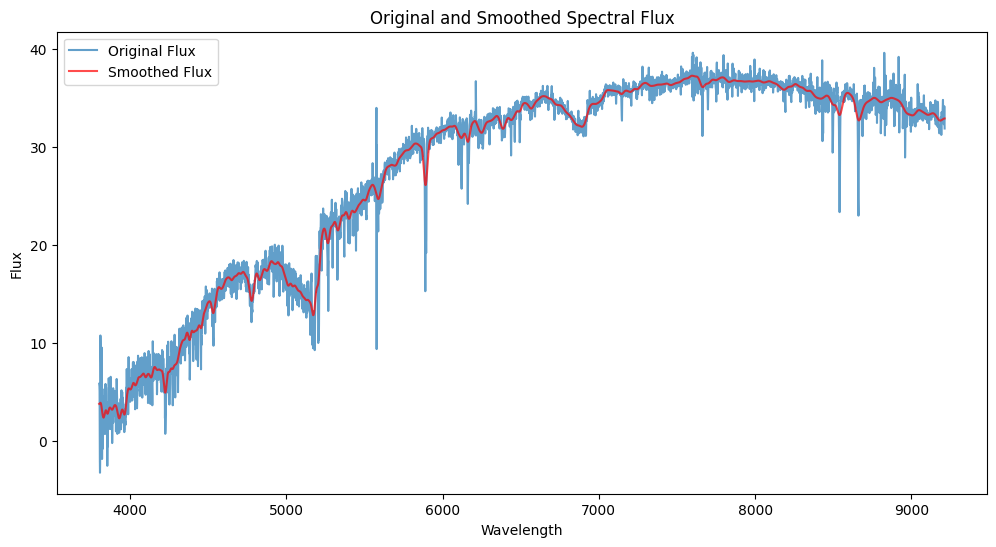

In [9]:
from scipy.ndimage import gaussian_filter1d

# Applying Gaussian smoothing to the flux data
smoothed_flux = gaussian_filter1d(flux, sigma=8)

# Plotting the original and smoothed flux against wavelength
plt.figure(figsize=(12, 6))
plt.plot(wavelength, flux, label="Original Flux", alpha=0.7)
plt.plot(
    wavelength,
    smoothed_flux,
    label="Smoothed Flux",
    color="red",
    alpha=0.7,
)
plt.xlabel("Wavelength")
plt.ylabel("Flux")
plt.title("Original and Smoothed Spectral Flux")
plt.legend()
plt.show()

In [10]:
features_df = flux.agg(["mean", "std", "skew", "kurtosis"]).to_frame().T
features_df

,mean,std,skew,kurtosis
flux,24.919971,11.348377,-0.597907,-1.089224


In [11]:
# http://dr18.sdss.org/sas/dr18/spectro/sdss/redux/v5_13_2/spectra/lite/6413/spec-6413-56336-0522.fits
# http://dr18.sdss.org/sas/dr18/spectro/sdss/redux/26/spectra/lite/2906/spec-2906-54577-0461.fits
run2d = "v5_13_2"
plate = 6413
mjd = 56336
fiberid = 522
f"http://dr18.sdss.org/sas/dr18/spectro/sdss/redux/{run2d}/spectra/lite/{plate}/spec-{plate}-{mjd}-{fiberid:04d}.fits"

'http://dr18.sdss.org/sas/dr18/spectro/sdss/redux/v5_13_2/spectra/lite/6413/spec-6413-56336-0522.fits'

```sql
SELECT s.specObjId, s.bestObjId, s.run2d, s.plate, mjd, fiberid, ra, dec, z, zErr
FROM SpecObj s
JOIN GalSpecLine AS g ON s.specobjid = g.specobjid
WHERE s.class = 'STAR' AND zWarning = 0
AND
    h_alpha_flux > h_alpha_flux_err * 5 AND
    h_beta_flux > h_beta_flux_err * 5 AND
    s.bestObjId <> 0
```


In [12]:
import pandas as pd
import os


# Generate URLs for spectra
def spectra_fits_url(run2d: str, plate: int, mjd: int, fiberid: int):
    return f"https://dr18.sdss.org/sas/dr18/spectro/sdss/redux/{run2d}/spectra/lite/{plate:04d}/spec-{plate:04d}-{mjd}-{fiberid:04d}.fits"


def spectra_fits_filename(plate: int, mjd: int, fiberid: int):
    return f"spec-{plate:04d}-{mjd}-{fiberid:04d}.fits"


def read_spectra_fits(plate: int, mjd: int, fiberid: int) -> pd.DataFrame:
    filename = spectra_fits_filename(plate, mjd, fiberid)
    with fits.open(f"../spectra/{filename}") as hdul:
        coadd_data = pd.DataFrame(hdul[1].data)  # type: ignore
    return coadd_data


star_spectra_meta = pd.read_csv(
    "../Skyserver_SQL12_12_2023 6_31_05 AM.csv",
    skiprows=1,
    dtype={"run2d": str, "plate": int, "mjd": int, "fiberid": int, "bestObjId": str},
)

with open("../aria2_input_image.txt", "w") as f:
    ra_list = star_spectra_meta["ra"].tolist()
    dec_list = star_spectra_meta["dec"].tolist()
    for url, filename in generate_urls(ra_list, dec_list, scale, width, height):
        if not os.path.exists(f"../images/{filename}"):
            f.write(f"{url}\n  out={filename}\n\n")

with open("../aria2_input_spectra.txt", "w") as f:
    for _, row in star_spectra_meta.iterrows():
        if os.path.exists(
            f"../spectra/{spectra_fits_filename(row['plate'], row['mjd'], row['fiberid'])}"
        ):
            continue
        url = spectra_fits_url(row["run2d"], row["plate"], row["mjd"], row["fiberid"])
        f.write(f"{url}\n")

In [13]:
# min_loglam_common = float("-inf")
# max_loglam_common = float("inf")

# min_loglam_all = float("inf")
# max_loglam_all = float("-inf")

# for _, row in star_spectra_meta.iterrows():
#     coadd_data = read_spectra_fits(row["plate"], row["mjd"], row["fiberid"])

#     min_loglam = coadd_data["loglam"].min()
#     max_loglam = coadd_data["loglam"].max()
#     min_loglam_common = max(min_loglam_common, min_loglam)
#     max_loglam_common = min(max_loglam_common, max_loglam)
#     min_loglam_all = min(min_loglam_all, min_loglam)
#     max_loglam_all = max(max_loglam_all, max_loglam)

# min_loglam_common, max_loglam_common, min_loglam_all, max_loglam_all

In [55]:
# Sample between 3.6, 3.9 for 32 points
sampled_loglam = np.linspace(3.6, 3.9, 32)


def sample_flux_interpolate(data, sampled_loglam) -> np.ndarray:
    smoothed_flux = gaussian_filter1d(data["flux"], sigma=5)
    sampled_flux = np.interp(sampled_loglam, data["loglam"], smoothed_flux)  # type: ignore
    return sampled_flux


sampled_flux_T = []

for index, row in star_spectra_meta.iterrows():
    data = read_spectra_fits(row["plate"], row["mjd"], row["fiberid"])

    # Clamp flux to [0, 2000]
    data["flux"] = data["flux"].clip(0, 2000)

    sampled_flux = sample_flux_interpolate(data, sampled_loglam)
    sampled_flux_reshaped = sampled_flux.reshape(1, -1)[0]
    # Normalize flux
    sampled_flux_reshaped = sampled_flux_reshaped / np.linalg.norm(
        sampled_flux_reshaped
    )
    sampled_flux_T.append(sampled_flux_reshaped)

    if index % 500 == 0:  # type: ignore
        print(index)

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
25000
25500
26000
26500
27000
27500
28000
28500
29000
29500


In [56]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# scaled_sampled_flux_T = scaler.fit_transform(sampled_flux_T)  # type: ignore
# scaled_sampled_flux_T

/Users/i/Library/Caches/pypoetry/virtualenvs/starclass-uQVTgZe_-py3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/i/Library/Caches/pypoetry/virtualenvs/starclass-uQVTgZe_-py3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/i/Library/Caches/pypoetry/virtualenvs/starclass-uQVTgZe_-py3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Use

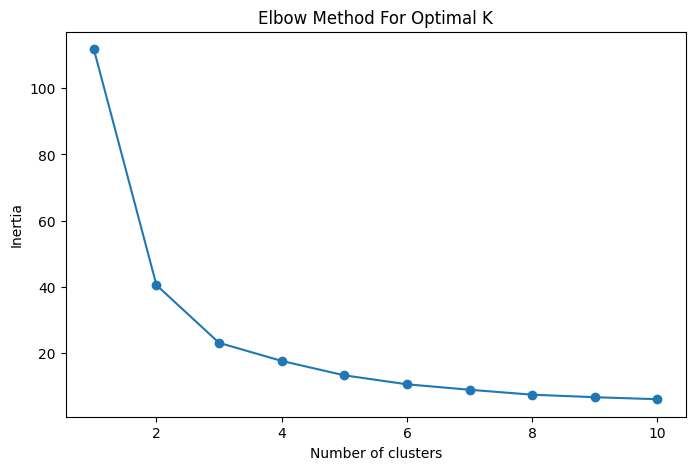

In [57]:
from sklearn.cluster import KMeans

inertia = []
k_values = range(1, 11)  # Trying different numbers of clusters from 1 to 10
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(sampled_flux_T[:1000])
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker="o")
plt.title("Elbow Method For Optimal K")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [64]:
clusters = 4
kmeans = KMeans(n_clusters=clusters, random_state=0)
kmeans.fit(sampled_flux_T)

star_spectra_meta["cluster"] = kmeans.labels_

star_spectra_meta["cluster"].value_counts(), star_spectra_meta.head()

/Users/i/Library/Caches/pypoetry/virtualenvs/starclass-uQVTgZe_-py3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(cluster
 3    12295
 0    10769
 1     4908
 2     1531
 Name: count, dtype: int64,
             specObjId            bestObjId run2d  plate    mjd  fiberid  \
 0  364841900424849408  1237674649929842920    26    324  51666      183   
 1  364843549692291072  1237648720695066860    26    324  51666      189   
 2  364849597006243840  1237674649392971982    26    324  51666      211   
 3  364854544808568832  1237648720694935743    26    324  51666      229   
 4  364857843343452160  1237648720157999252    26    324  51666      241   
 
           ra       dec         z      zErr  cluster  
 0  182.66534 -0.306265  0.000024  0.000012        0  
 1  182.79719 -0.566430  0.000177  0.000015        0  
 2  182.64070 -0.779009 -0.000050  0.000025        3  
 3  182.46091 -0.595250 -0.000066  0.000021        0  
 4  182.24484 -0.989620  0.000150  0.000018        0  )

Cluster 0 - 0 - 1237662530599846081
Cluster 0 - 1 - 1237657587095830640
Cluster 1 - 0 - 1237670961629889486
Cluster 1 - 1 - 1237665567157977239
Cluster 2 - 0 - 1237666228054524184
Cluster 2 - 1 - 1237666462648303708
Cluster 3 - 0 - 1237667255613915298
Cluster 3 - 1 - 1237657190372081819


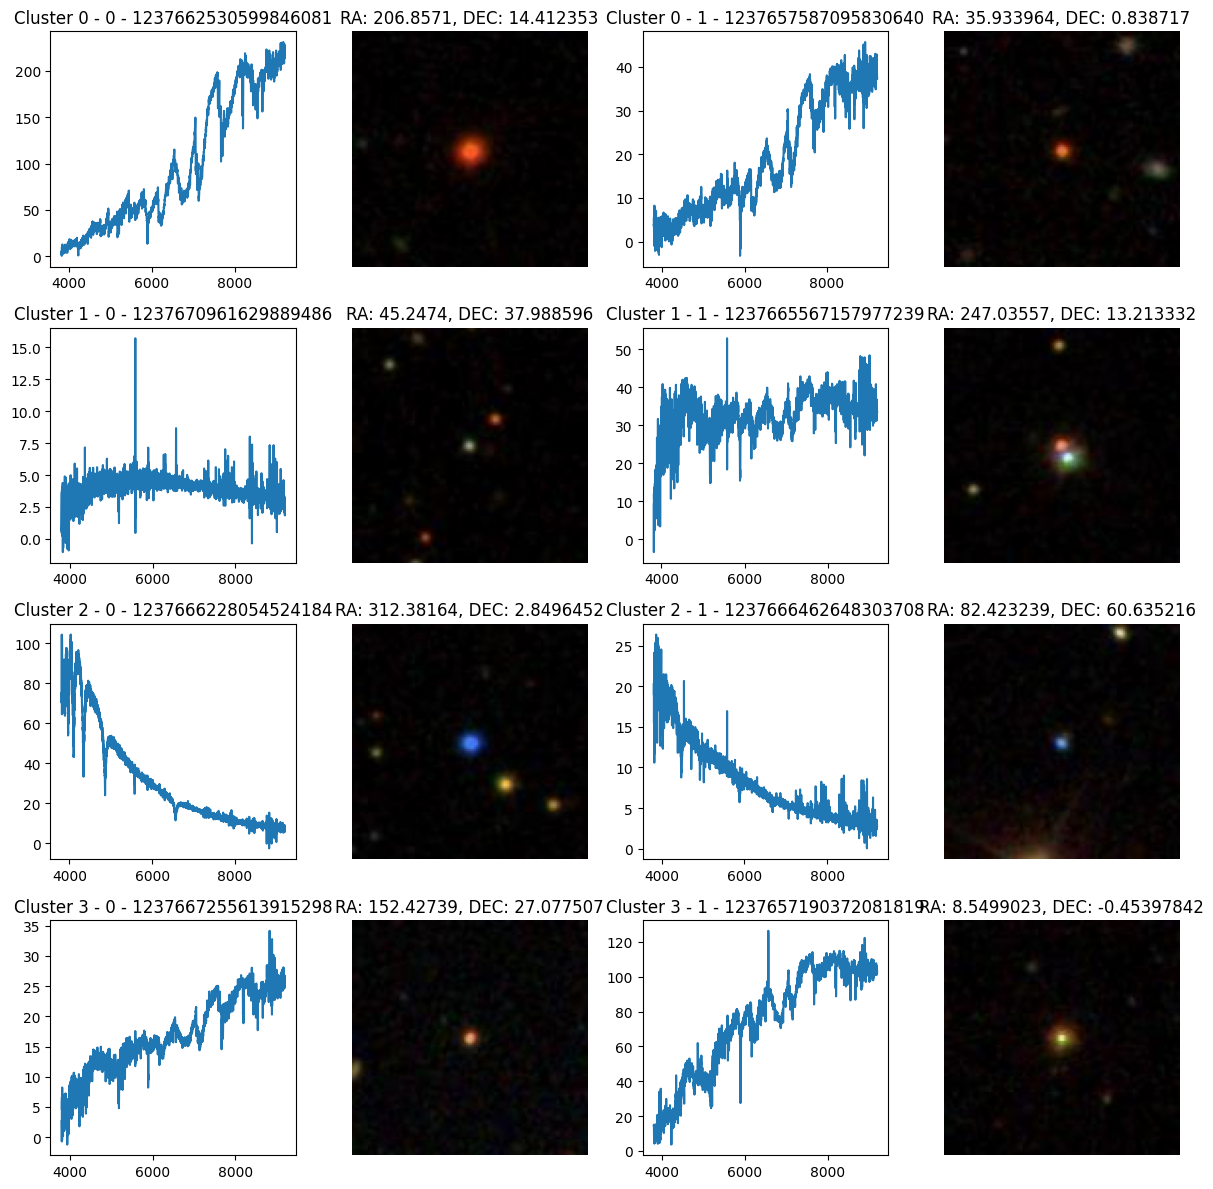

In [68]:
# Pick 2 random spectra from each cluster and plot them
import random

random.seed(0)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(12, 12))
for cluster in range(clusters):
    cluster_df = star_spectra_meta[star_spectra_meta["cluster"] == cluster]
    sample_df = cluster_df.sample(2)

    for index, (_, row) in enumerate(sample_df.iterrows()):
        data = read_spectra_fits(row["plate"], row["mjd"], row["fiberid"])

        # Plot the spectrum
        plt.subplot(clusters, 4, cluster * 4 + index * 2 + 1)
        plt.plot(10 ** data["loglam"], data["flux"])
        plt.title(f"Cluster {cluster} - {index} - {row['bestObjId']}")

        # Load and display the image
        ra, dec = row["ra"], row["dec"]
        image_path = f"../images/image_{ra}_{dec}.jpg"
        img = mpimg.imread(image_path)
        plt.subplot(clusters, 4, cluster * 4 + index * 2 + 2)
        plt.imshow(img)
        plt.title(f"RA: {ra}, DEC: {dec}")
        plt.axis("off")  # To turn off axis for images

        print(f"Cluster {cluster} - {index} - {row['bestObjId']}")

plt.tight_layout()
plt.show()